# Optimal Statistic Project Workbook
 Author: Robin Case

 Tutorial for GRAVWise.

We will be using the Frequentist techniques that we learned from lecture to try and find the signal-to-noise (SNR) for a source in different sets of time series. 
Our objectives:
1. Simulate datasets with white noise + a sine wave. 
2. Develop a frequentist statistic to recover the amplitude of the sine wave.
3. Understand the difference between Maximum-likleihood estimates (MLE) and maximum a posterior (MaP) estimates
4. find the SNR that were generated for us using the detection code we made. 
5. CHALLENGE: Look for a correlated signal across different pairs of residuals. 

# Import important packages

In [10]:
# Increase the resolution of your plots
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Autoreload is handy if the functions within the imports change between runs. 
# Helpful for development!
%load_ext autoreload
%autoreload 2

#Packages we will use
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import os


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 1.0 The Data Model and The Optimal Statistic

In data analysis, we typically represent our data as the sum of the noise and the signals that are present. 

$$d = s + n $$


$$
p(n)=\frac{1}{\sqrt{2 \pi \sigma^2}}\prod_i\exp\left(-\frac{n_i^2}{2\sigma^2}\right),
$$

$$
p(d|\lambda)=\frac{1}{\sqrt{2 \pi \sigma^2}}\prod_i\exp\left(-\frac{(d_i-s_i(\lambda))^2}{2\sigma^2}\right).
$$

$$
\log\Lambda=(d|s)-\frac{1}{2}(s|s),
$$

$$(x|y)=\sum_i x_iy_i/\sigma^2$$

$$s(t,A,f) = A\sin(2\pi ft)$$

$$
\alpha = \int_{x_1}^{x_2}dx\,\, p(x|\lambda)
$$

$$
\alpha = \int_{\lambda_1}^{\lambda_2}d\lambda\,\, p(\lambda|d),
$$

$$
\log\Lambda=(d|s)-\frac{1}{2}(s|s).
$$

$$
\log\Lambda=A(d|\tilde{s})-\frac{A^2}{2}(\tilde{s}|\tilde{s}).
$$

$$
0 = \frac{\partial \log\Lambda}{\partial A} = (d|\tilde{s}) -\hat{A}(\tilde{s}|\tilde{s})
$$

$$
\hat{A}=\frac{(d|\tilde{s})}{(\tilde{s}|\tilde{s})}.
$$

$$
\sigma_{\hat{A}}^2 = \langle \hat{A}\hat{A} \rangle -\langle \hat{A} \rangle^2 = \frac{1}{(\tilde{s}|\tilde{s})},
$$

$$
p(A)=\frac{1}{\sqrt{2\pi\sigma_A^2}}\exp\left(-\frac{(A-A_{\rm true})^2}{2\sigma_A^2}\right)
$$





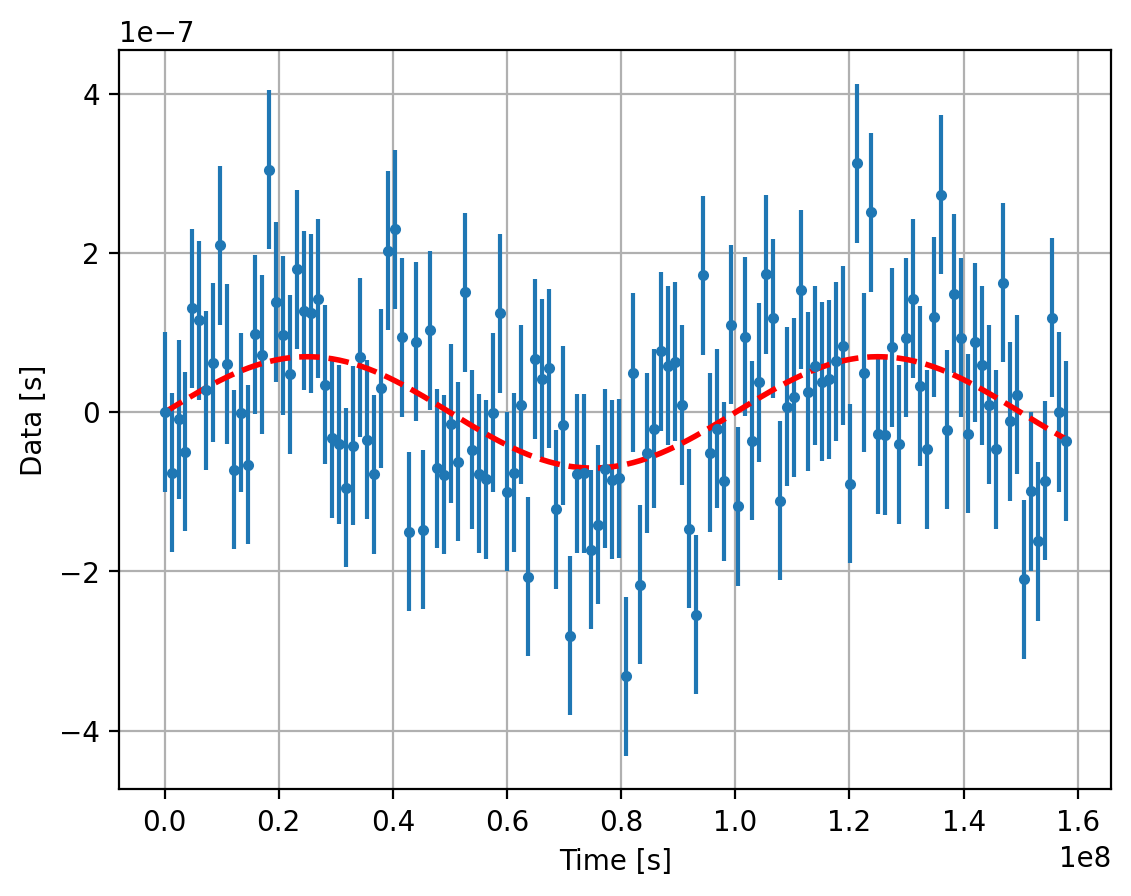

In [5]:
# simulated data
freq = 1e-8
sigma = 1e-7
t = np.linspace(0, 3.16e7*5, 130)
A = 7e-8
signal = A*np.sin(2*np.pi*freq*t)

# call function to simulate data
data = signal + np.random.randn(len(t))*sigma

# plot
plt.errorbar(x=t, y=data, yerr=sigma, fmt='.')
plt.plot(t, signal, lw=2, color='r', ls='--')
plt.xlabel('Time [s]')
plt.ylabel('Data [s]')
plt.grid()

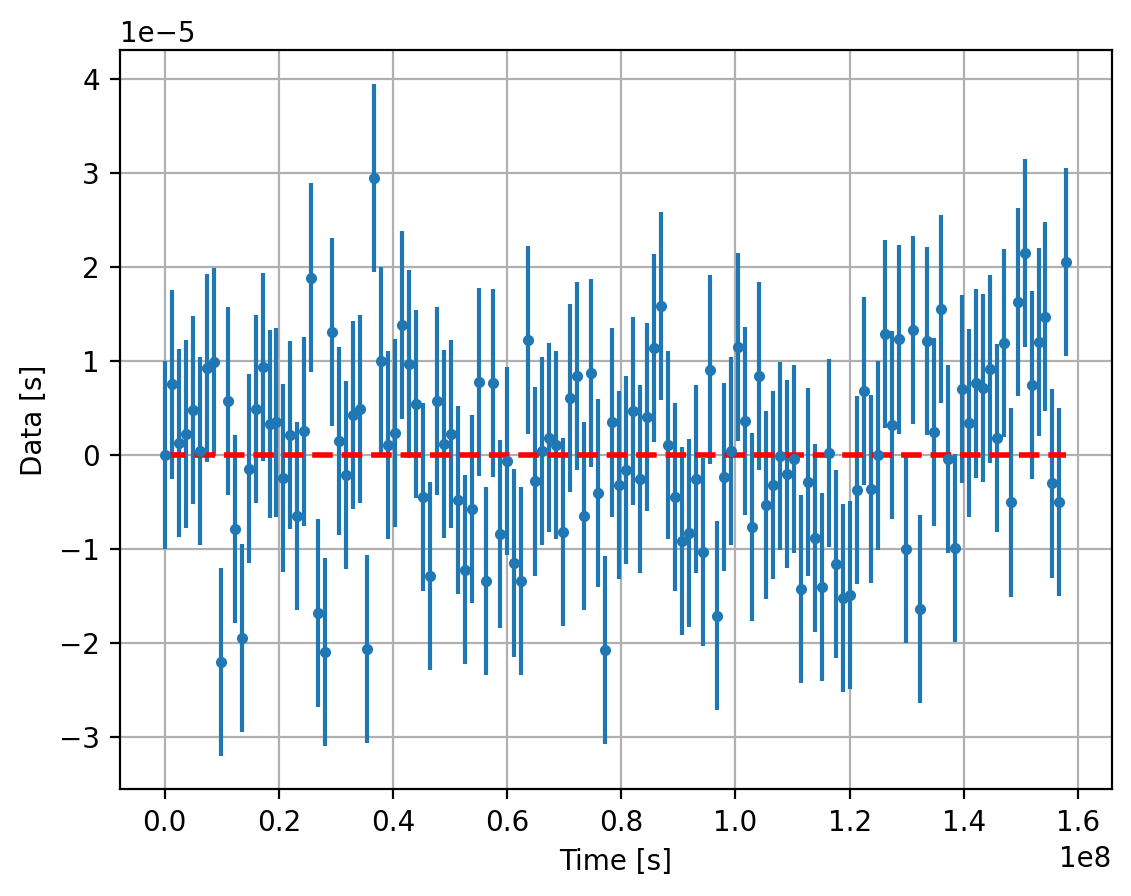

In [12]:
# simulated data
freq = 1e-8
sigma = 1e-5
t = np.linspace(0, 3.16e7*5, 130)
A = 0
signal = A*np.sin(2*np.pi*freq*t)

# call function to simulate data
data = signal + np.random.randn(len(t))*sigma

# plot
plt.errorbar(x=t, y=data, yerr=sigma, fmt='.')
plt.plot(t, signal, lw=2, color='r', ls='--')
plt.xlabel('Time [s]')
plt.ylabel('Data [s]')
plt.grid()
save_data_dir = '../Data/sim_data/'
os.makedirs(save_data_dir, exist_ok = True)
np.savetxt(save_data_dir + '1e-5_sigma.txt', data)


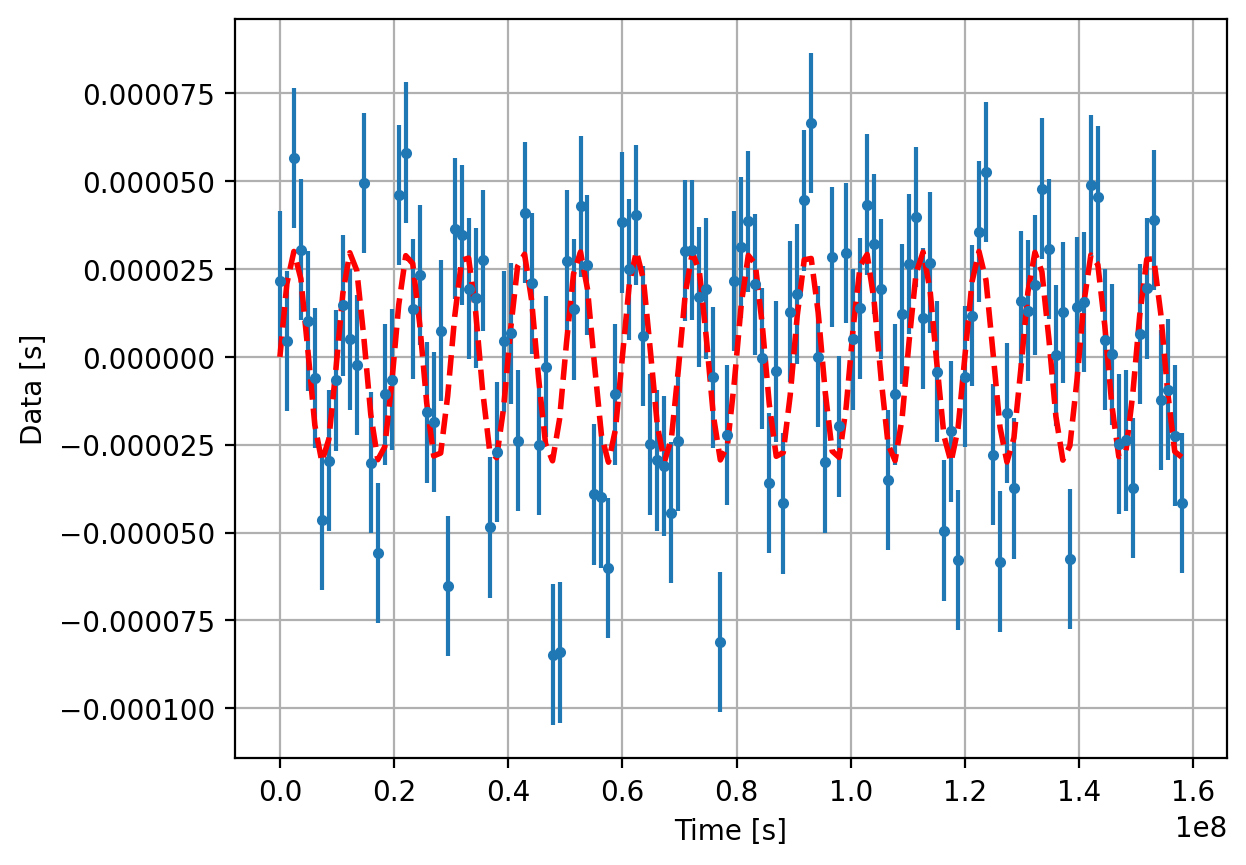

In [71]:
# simulated data
freq = 1e-7
sigma = 2e-5
t = np.linspace(0, 3.16e7*5, 130)
A = 3e-5
signal = A*np.sin(2*np.pi*freq*t)

# call function to simulate data
data = signal + np.random.randn(len(t))*sigma

# plot
plt.errorbar(x=t, y=data, yerr=sigma, fmt='.')
plt.plot(t, signal, lw=2, color='r', ls='--')
plt.xlabel('Time [s]')
plt.ylabel('Data [s]')
plt.grid()
save_data_dir = '../Data/sim_data/'
os.makedirs(save_data_dir, exist_ok = True)
np.savetxt(save_data_dir + f'{sigma}_sigma.txt', data)

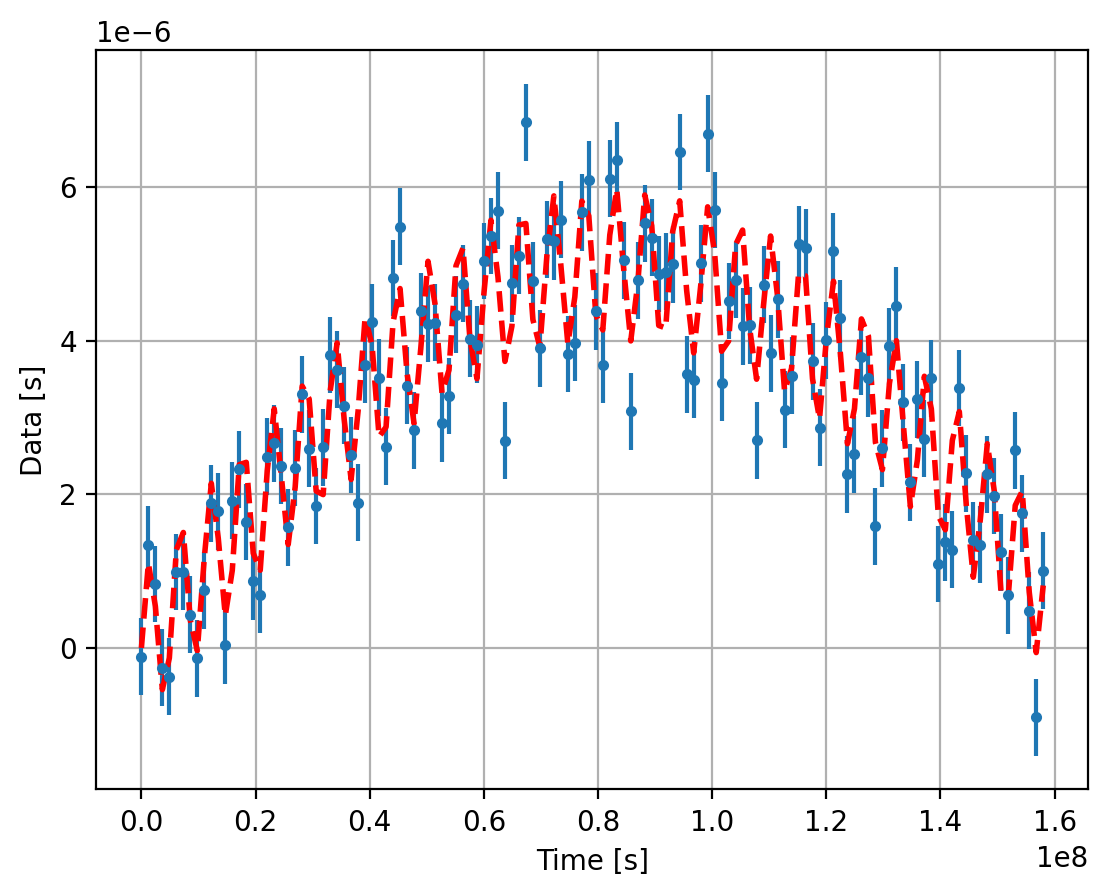

In [63]:
# simulated data
freq = 3e-9
sigma = 5e-7
t = np.linspace(0, 3.16e7*5, 130)
A1 = 5e-6
signal1 = A1*np.sin(2*np.pi*freq*t)
freq2 = 1e-6
A2 = 1e-6
signal2 = A2*np.sin(2*np.pi*freq2*t)

# call function to simulate data
data = signal1 + signal2+ np.random.randn(len(t))*sigma

# plot
plt.errorbar(x=t, y=data, yerr=sigma, fmt='.')
plt.plot(t, signal1+signal2, lw=2, color='r', ls='--')
plt.xlabel('Time [s]')
plt.ylabel('Data [s]')
plt.grid()
save_data_dir = '../Data/sim_data/'
os.makedirs(save_data_dir, exist_ok = True)
np.savetxt(save_data_dir + f'{sigma}_sigma.txt', data)

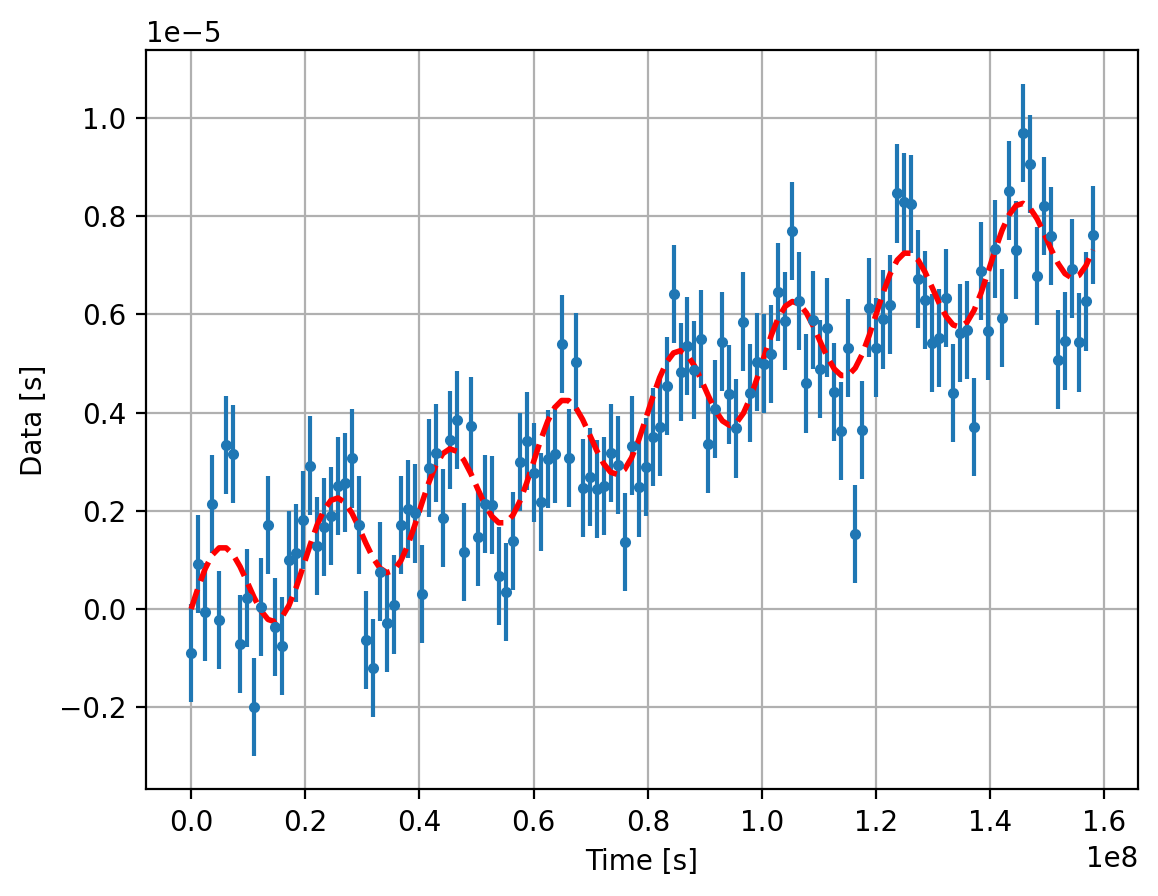

In [62]:
# simulated data
freq = 5e-8
sigma = 1e-6
t = np.linspace(0, 3.16e7*5, 130)
A1 = 1e-6
signal1 = A1*np.sin(2*np.pi*freq*t)
freq2 = 1e-6
A2 = 5e-14
signal2 = A2*t

# call function to simulate data
data = signal1 + signal2+ np.random.randn(len(t))*sigma

# plot
plt.errorbar(x=t, y=data, yerr=sigma, fmt='.')
plt.plot(t, signal1+signal2, lw=2, color='r', ls='--')
plt.xlabel('Time [s]')
plt.ylabel('Data [s]')
plt.grid()
save_data_dir = '../Data/sim_data/'
os.makedirs(save_data_dir, exist_ok = True)
np.savetxt(save_data_dir + f'{sigma}_sigma.txt', data)